In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas
import numpy as np

data = pandas.read_csv('gbm-data.csv')
X = data.values[:, 1:]
y = data.Activity

In [29]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from math import exp
from sklearn.metrics import log_loss

learning_rates = [1, 0.5, 0.3, 0.2, 0.1]

def transform_value(val):
    denom = 1 + exp(-1 * val)
    return 1.0 / denom

def transform_vector(v):
    return np.apply_along_axis(transform_value, 1, v)

loss_data = {}

TRAIN_LOSS = 'train_loss'
TEST_LOSS = 'test_loss'
MIN_LOSS = 'min_loss'
MIN_LOSS_ITER = 'min_loss_iter'

def calculate_loss(clf, X, y):
    gen = clf.staged_decision_function(X)
    transformed = np.array([transform_vector(row) for row in gen])
    return np.array([log_loss(y, iter_value) for iter_value in transformed])

for rate in learning_rates:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241, learning_rate=rate)
    clf.fit(X_train, y_train)
    
    train_loss = calculate_loss(clf, X_train, y_train)
    test_loss = calculate_loss(clf, X_test, y_test)
            
    min_loss_index = np.argmin(test_loss)
    min_loss = test_loss[min_loss_index]
    
    loss_data[rate] = {
        TRAIN_LOSS: train_loss,
        TEST_LOSS: test_loss,
        MIN_LOSS: min_loss,
        MIN_LOSS_ITER: min_loss_index + 1
    }

Learning rate: 0.1: Iter #52 - 0.53
Learning rate: 0.2: Iter #37 - 0.53
Learning rate: 0.3: Iter #19 - 0.54
Learning rate: 0.5: Iter #5 - 0.56
Learning rate: 1: Iter #1 - 0.58


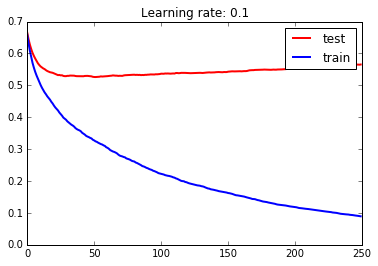

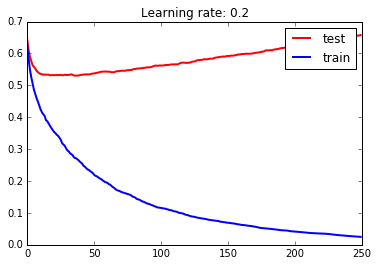

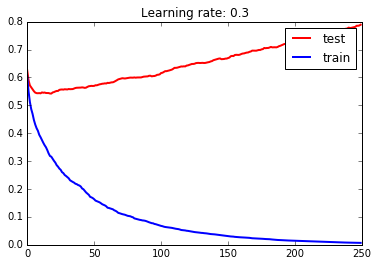

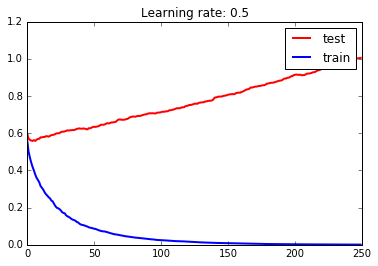

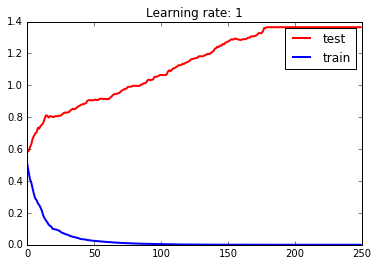

In [31]:
for k in sorted(loss_data.keys()):
    print 'Learning rate: {rate}: Iter #{iter} - {loss:.2f}'.format(
        iter=loss_data[k][MIN_LOSS_ITER], rate=k, loss=loss_data[k][MIN_LOSS])

    
for rate in sorted(loss_data.keys()):
    info = loss_data[rate]
    train_loss = info[TRAIN_LOSS]
    test_loss = info[TEST_LOSS]
    
    plt.figure()
    plt.plot(range(len(test_loss)), test_loss, 'r', linewidth=2)
    plt.plot(range(len(train_loss)), train_loss, 'b', linewidth=2)
    plt.legend(['test', 'train'])
    plt.title('Learning rate: {}'.format(rate))
    plt.show()

In [32]:
res1 = 'overfitting'
with open('assignments/2_1.txt', 'w') as f:
    f.write(res1)
    
print res1

overfitting


In [33]:
rate = 0.2
min_iter = loss_data[rate][MIN_LOSS_ITER]
min_loss = loss_data[rate][MIN_LOSS]

res2 = '{loss:.2f} {iter}'.format(iter=min_iter, loss=min_loss)

with open('assignments/2_2.txt', 'w') as f:
    f.write(res2)

print res2

0.53 37


In [41]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=min_iter, random_state=241)
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)[:, 1:]
transformed = np.apply_along_axis(transform_value, 1, pred)
score = log_loss(y_test, pred)

res3 = '{:.2f}'.format(score)
with open('assignments/2_3.txt', 'w') as f:
    f.write(res3)

print res3

0.54
